In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/alzheimers-prediction-dataset-global/alzheimers_prediction_dataset.csv')

In [3]:
data.head(3)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No


In [4]:
data.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [5]:
data.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [6]:
gender_counts = data.groupby('Gender')['Alzheimer’s Diagnosis'].value_counts().unstack()
print(gender_counts)

Alzheimer’s Diagnosis     No    Yes
Gender                             
Female                 21873  15376
Male                   21697  15337


In [7]:
family_history_counts = data.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].value_counts().unstack()
print(family_history_counts)

Alzheimer’s Diagnosis             No    Yes
Family History of Alzheimer’s              
No                             32864  19140
Yes                            10706  11573


# Alzheimer’s Diagnosis by Income Level

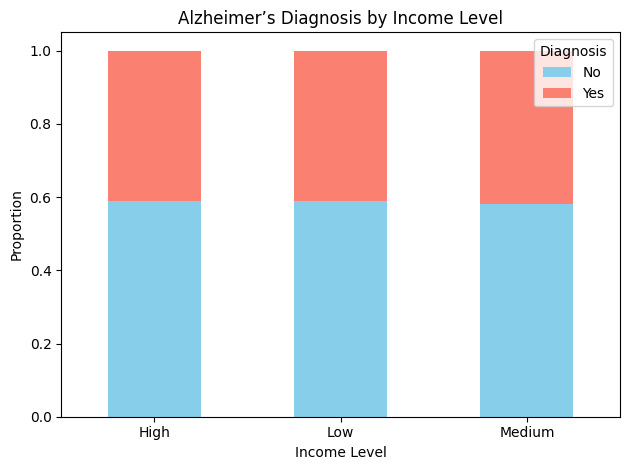

In [8]:
income_diagnosis = data.groupby('Income Level')['Alzheimer’s Diagnosis'].value_counts(normalize=True).unstack()
income_diagnosis.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])
plt.title('Alzheimer’s Diagnosis by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.show()


# Number of People with Alzheimer's disease by Country

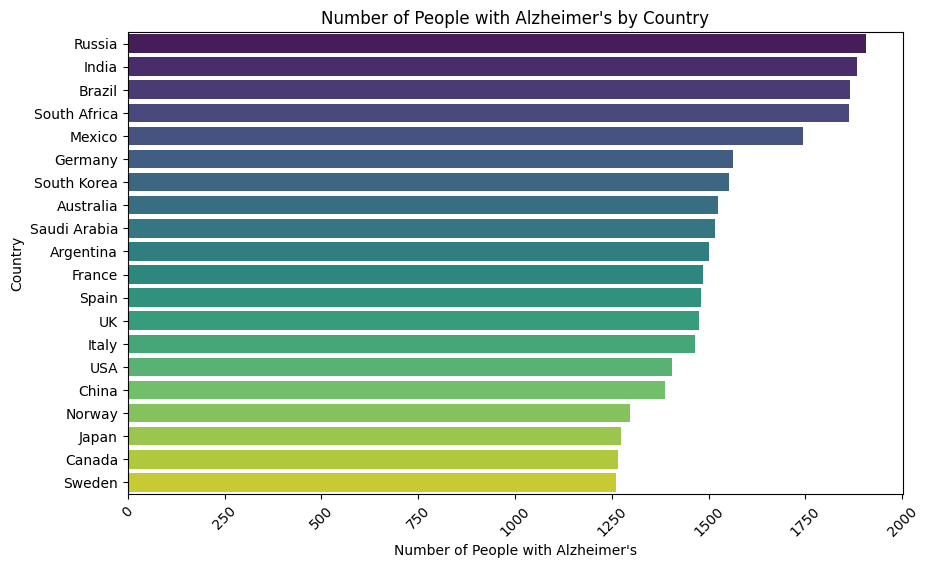

In [9]:
alzheimers_count = data[data['Alzheimer’s Diagnosis'] == 'Yes'].groupby('Country').size().reset_index(name='count')
alzheimers_count = alzheimers_count.sort_values(by='count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=alzheimers_count, y='Country', x='count', palette='viridis')
plt.title('Number of People with Alzheimer\'s by Country')
plt.xlabel('Number of People with Alzheimer\'s')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

# Alzheimer's Diagnosis by Family history

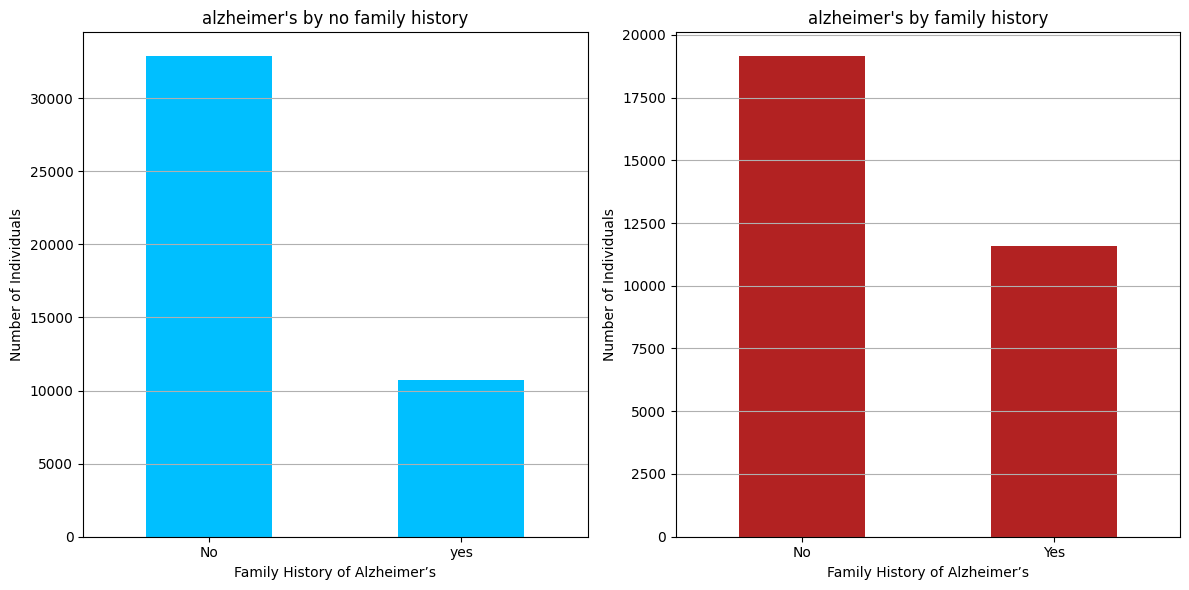

In [10]:
alz_counts = data.groupby(['Family History of Alzheimer’s', 'Alzheimer’s Diagnosis']).size().unstack()

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for individuals with no history
alz_counts.get('No', pd.Series()).plot(kind='bar', stacked=True, ax=axes[0], color='deepskyblue')
axes[0].set_title('alzheimer\'s by no family history')
axes[0].set_ylabel('Number of Individuals')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'yes'], rotation=0)
axes[0].grid(axis='y')

# Plot for individuals with history
alz_counts.get('Yes', pd.Series()).plot(kind='bar', stacked=True, ax=axes[1], color='firebrick')
axes[1].set_title('alzheimer\'s by family history')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Alzheimer's Diagnosis by Gender

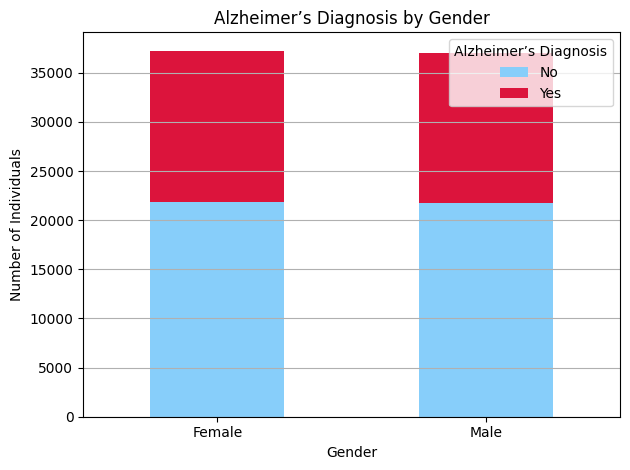

In [11]:
alz_counts = data.groupby(['Gender', 'Alzheimer’s Diagnosis']).size().unstack()
alz_counts.plot(kind='bar', stacked=True, color=[ 'lightskyblue','crimson'])
plt.title('Alzheimer’s Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Alzheimer’s Diagnosis')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Alzheimer's Diagnosis by Depression Level

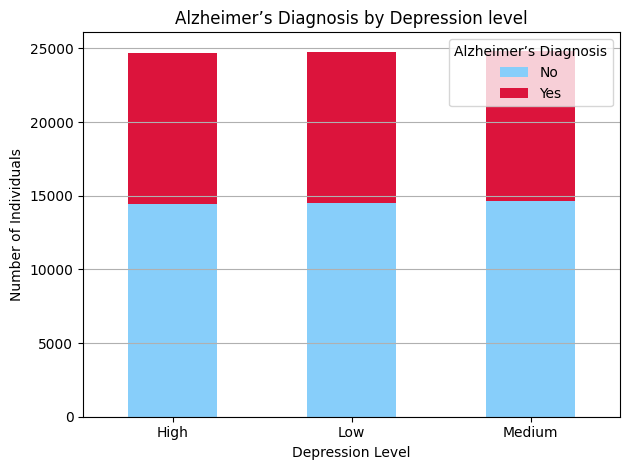

In [12]:
alz_counts = data.groupby(['Depression Level', 'Alzheimer’s Diagnosis']).size().unstack()
alz_counts.plot(kind='bar', stacked=True, color=[ 'lightskyblue','crimson'])
plt.title('Alzheimer’s Diagnosis by Depression level')
plt.xlabel('Depression Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Alzheimer’s Diagnosis')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Alzheimer’s Diagnosis by Genetic Risk Factor (APOE-ε4 allele)
- The figures show a direct relationship between **Alzheimer’s** and **genetic risk factor** (APOE-ε4 allele)

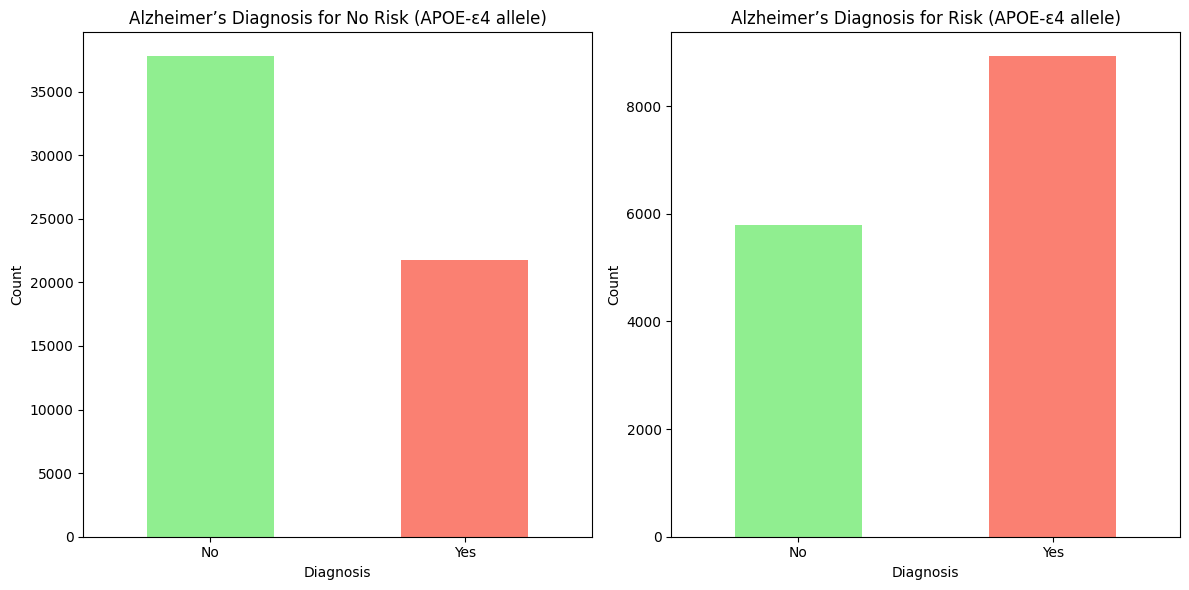

In [13]:
risk_diagnosis = data.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].value_counts().unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for No Risk
risk_diagnosis.loc['No'].plot(kind='bar', ax=axes[0], color=["lightgreen", "salmon"])
axes[0].set_title('Alzheimer’s Diagnosis for No Risk (APOE-ε4 allele)')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Plot for Risk
risk_diagnosis.loc['Yes'].plot(kind='bar', ax=axes[1], color=["lightgreen", "salmon"])
axes[1].set_title('Alzheimer’s Diagnosis for Risk (APOE-ε4 allele)')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()